In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daigt-proper-train-dataset/train_drcat_03.csv
/kaggle/input/daigt-proper-train-dataset/train_drcat_02.csv
/kaggle/input/daigt-proper-train-dataset/train_drcat_04.csv
/kaggle/input/daigt-proper-train-dataset/train_drcat_01.csv
/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv
/kaggle/input/llm-7-prompt-training-dataset/train_essays_RDizzl3_seven_v2.csv
/kaggle/input/llm-7-prompt-training-dataset/train_essays_7_prompts_v2.csv
/kaggle/input/llm-7-prompt-training-dataset/train_essays_7_prompts.csv
/kaggle/input/llm-7-prompt-training-dataset/train_essays_RDizzl3_seven_v1.csv
/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv
/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv
/kaggle/input/llm-detect-ai-generated-text/test_essays.csv
/kaggle/input/llm-detect-ai-generated-text/train_essays.csv


In [6]:
import pandas as pd

# Load the data
test_essays = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')
# train_essays = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_essays.csv')
train_prompts = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv')

train_essays_external = "/kaggle/input/daigt-proper-train-dataset/train_drcat_01.csv"
train_essays_ex = pd.read_csv(train_essays_external)

train_essays_external2 = "/kaggle/input/daigt-proper-train-dataset/train_drcat_02.csv"
train_essays_ex2 = pd.read_csv(train_essays_external2)

train_essays_external3 = "/kaggle/input/daigt-proper-train-dataset/train_drcat_03.csv"
train_essays_ex3 = pd.read_csv(train_essays_external3)

# train_essays_ex = train_essays_ex[train_essays_ex["RDizzl3_seven"]==False]

train_essays_ex.rename(columns = {"label":"generated"}, inplace=True)
train_essays_ex['generated'].value_counts()

train_essays_ex2.rename(columns = {"label":"generated"}, inplace=True)
train_essays_ex2['generated'].value_counts()

train_essays_ex3.rename(columns = {"label":"generated"}, inplace=True)
train_essays_ex3['generated'].value_counts()

train_essays = pd.concat([train_essays_ex[["text", "generated"]], train_essays_ex2[["text", "generated"]], train_essays_ex3[["text", "generated"]]])

def undersample(df, label_column='generated'):
    label_counts = df[label_column].value_counts()
    min_count = label_counts.min()

    balanced_df = pd.DataFrame()

    for label, count in label_counts.items():
        label_subset = df[df[label_column] == label]
        undersampled_subset = label_subset.sample(n=min_count, random_state=42)
        balanced_df = pd.concat([balanced_df, undersampled_subset], ignore_index=True)

    return balanced_df

# train_essays = undersample(train_essays)
# Display the first few rows of each dataframe to get an overview
print("Test Essays:")
print(test_essays.head())

print("\nTrain Essays:")
print(train_essays.head())

print("\nTrain Prompts:")
print(train_prompts.head())

# Check for missing values
print("\nMissing values in Test Essays:")
print(test_essays.isnull().sum())

print("\nMissing values in Train Essays:")
print(train_essays.isnull().sum())

print("\nMissing values in Train Prompts:")
print(train_prompts.isnull().sum())

# Basic statistics for numerical columns (if any)
print("\nStatistics for Train Essays:")
print(train_essays.describe())

# Distribution of the 'generated' column in Train Essays
print("\nDistribution of 'generated' in Train Essays:")
print(train_essays['generated'].value_counts())

# Unique values in 'prompt_name' column in Train Prompts
print("\nUnique values in 'prompt_name' in Train Prompts:")
print(train_prompts['prompt_name'].unique())


Test Essays:
         id  prompt_id          text
0  0000aaaa          2  Aaa bbb ccc.
1  1111bbbb          3  Bbb ccc ddd.
2  2222cccc          4  CCC ddd eee.

Train Essays:
                                                text  generated
0  There are alot reasons to keep our the despise...          0
1  Driving smart cars that drive by themself has ...          0
2  Dear Principal,\n\nI believe that students at ...          0
3  Dear Principal,\n\nCommunity service should no...          0
4  My argument for the development of the driverl...          0

Train Prompts:
   prompt_id                       prompt_name  \
0          0                   Car-free cities   
1          1  Does the electoral college work?   

                                        instructions  \
0  Write an explanatory essay to inform fellow ci...   
1  Write a letter to your state senator in which ...   

                                         source_text  
0  # In German Suburb, Life Goes On Without Cars 

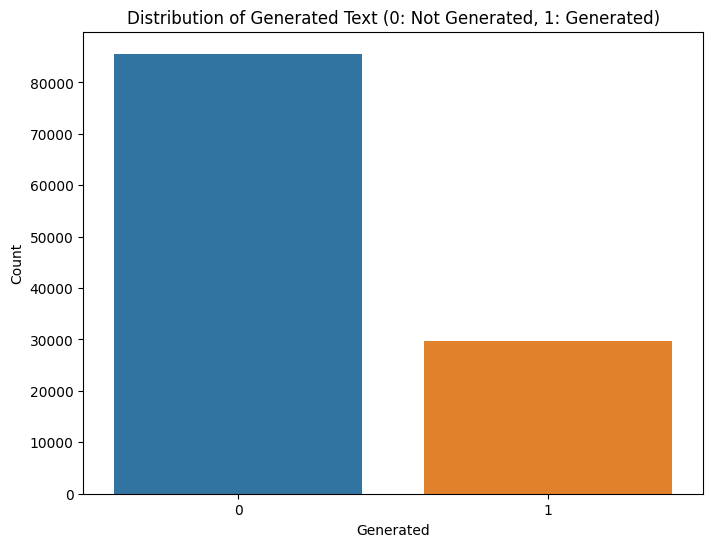

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'generated' column in Train Essays
plt.figure(figsize=(8, 6))
sns.countplot(x='generated', data=train_essays)
plt.title('Distribution of Generated Text (0: Not Generated, 1: Generated)')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = train_essays[['text']]
y = train_essays['generated']

# Split the data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of each dataframe to get an overview
print("Train Essays (Training Set):")
print(X_train.head())
print(y_train.head())

print("\nTrain Essays (Validation Set):")
print(X_valid.head())
print(y_valid.head())

# You can also print the shapes of the train and validation sets
print("\nShape of Training Set:", X_train.shape)
print("Shape of Validation Set:", X_valid.shape)


Train Essays (Training Set):
                                                    text
11701  Duke Ellington was a legendary jazz musician a...
23952  Dear Senator, The debate regarding the necessi...
20347  In " The Challenge of Exploring Venus" The aut...
23113  Do you think computers being able to tell stud...
28496  We often have to remind ourselves that phones ...
11701    1
23952    0
20347    0
23113    0
28496    0
Name: generated, dtype: int64

Train Essays (Validation Set):
                                                    text
30380  Okay so like, ther's this thing goin' round th...
14311  Hey, it's me, an average 8th grader! 😅\n\nOkay...
5993   Success is a term that is used to describe a p...
13520   Being under a curfew as a teenager can be a c...
32660  if i had to choose i would change to election ...
30380    1
14311    1
5993     1
13520    1
32660    0
Name: generated, dtype: int64

Shape of Training Set: (92200, 1)
Shape of Validation Set: (23050, 1)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Create a feature selection method
feature_selector = SelectKBest(chi2, k=2000)

# Create a pipeline with TF-IDF and feature selection
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('feature_selection', feature_selector)
])

# Fit and transform the training data
X_train_tfidf_selected = pipeline.fit_transform(X_train['text'], y_train)

# Transform the validation data
X_valid_tfidf_selected = pipeline.transform(X_valid['text'])

# Display the shape of the transformed sets
print("\nShape of Transformed Training Set:", X_train_tfidf_selected.shape)
print("Shape of Transformed Validation Set:", X_valid_tfidf_selected.shape)


Shape of Transformed Training Set: (92200, 2000)
Shape of Transformed Validation Set: (23050, 2000)


In [10]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Create a SVM model
svc_model = SVC(kernel='linear')

# Fit the model on the transformed training data
svc_model.fit(X_train_tfidf_selected, y_train)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17213
           1       0.99      0.98      0.98      5837

    accuracy                           0.99     23050
   macro avg       0.99      0.99      0.99     23050
weighted avg       0.99      0.99      0.99     23050



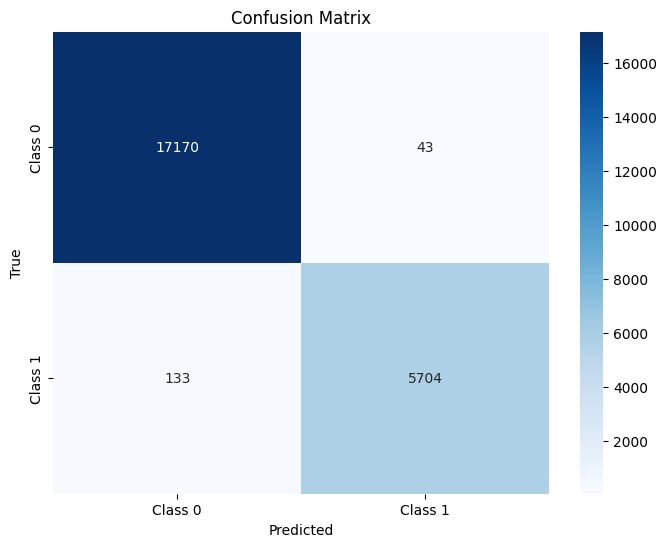

In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the validation set
y_pred = svc_model.predict(X_valid_tfidf_selected)

# Create confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')
f1 = f1_score(y_valid, y_pred, average='weighted')

# Print precision, recall, and F1 score
print(classification_report(y_valid, y_pred))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29792
           1       0.99      0.96      0.98     14414

    accuracy                           0.98     44206
   macro avg       0.99      0.98      0.98     44206
weighted avg       0.98      0.98      0.98     44206



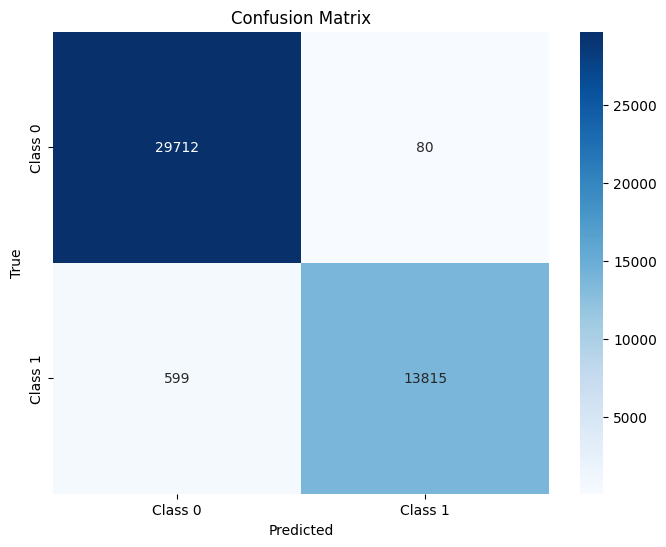

In [12]:
test = pd.read_csv('/kaggle/input/daigt-proper-train-dataset/train_drcat_04.csv')
# Transform the validation data
X_test_tfidf_selected = pipeline.transform(test['text'])
y_test = test['label']
# Predictions on the validation set
y_pred = svc_model.predict(X_test_tfidf_selected)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print precision, recall, and F1 score
print(classification_report(y_test, y_pred))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
